In [1]:
%pip install opencv-python-headless
%pip install torch torchvision

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/71/19/3c65483a80a1d062d46ae20faf5404712d25cb1dfdcaf371efbd67c38544/opencv_python_headless-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 880.8 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/6e/c8/cf445dcf86daf1aed298061ad14b8d335fa594596aeaa6b951231328ffd1/torchvision-0.16.2-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/da/6a/7fb9d82db4568834ff6d4df2fe3b143de4ed65a3f8f93e7daed703626cb6/torch-2.1.2-cp311-cp311-manylinux1_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 1.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.

In [2]:
#Imports
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [3]:
# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  

# Define the transformation
def transform_image(image):
    transform = T.Compose([T.ToTensor()])
    return transform(image).unsqueeze(0)



/home/kalema/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kalema/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/kalema/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [02:39<00:00, 1.05MB/s] 


In [6]:
def highlight_objects(image_path):
    # Load and preprocess the image
    image = Image.open(image_path)
    image_tensor = transform_image(image)

    # Perform object detection
    with torch.no_grad():
        prediction = model(image_tensor)

    # Process the prediction to extract traffic light bounding boxes and scores
    traffic_lights = [(box, score) for box, label, score in zip(prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']) if label == 10]

    # Draw bounding boxes and scores on the image
    image_np = np.array(image).copy()
    for box, score in traffic_lights:
        cv2.rectangle(image_np, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
        font_scale = 1.5  
        text = f"{score:.2f}"
        cv2.putText(image_np, text, (int(box[0]), int(box[1] - 5)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)


    # Plot the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

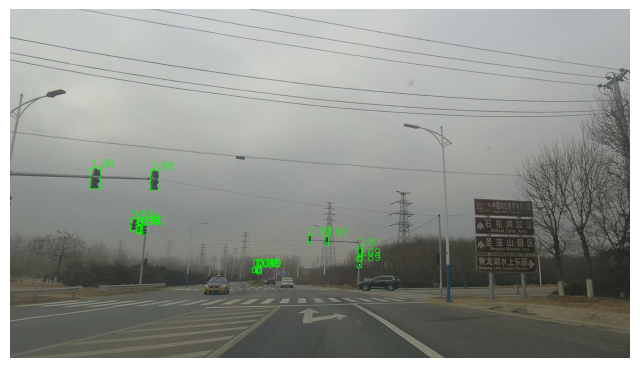

In [8]:
highlight_objects("/home/kalema/Downloads/traffic_lights/train_dataset/train_images/00033.jpg")